In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [2]:
# NLTK Imports
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')  # optional and may not be needed

# Initialize stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [3]:
# 2. Load Dataset
df = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
# 3. Preprocess the Text

import re

def clean_text(text):
    text = text.lower()                              # lowercase
    text = re.sub(r'<.*?>', '', text)                # remove HTML tags
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # remove URLs
    text = re.sub(r'[^a-z\s]', '', text)             # remove punctuation/numbers
    tokens = word_tokenize(text)                     # tokenize words
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['clean_review'] = df['review'].apply(clean_text)
df.head()


,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod youll hook ...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic there famili littl boy jake think there ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...


In [5]:
# 4. Encode Target Labels
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})


In [6]:
# 5. Split Data
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_review'], df['sentiment'], test_size=0.2, random_state=42, stratify=df['sentiment']
)


Class distribution:
 sentiment
1    25000
0    25000
Name: count, dtype: int64


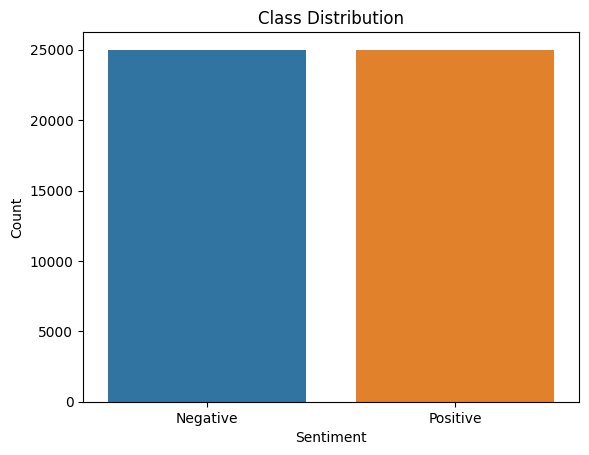

In [7]:
# Check class balance
import seaborn as sns
import matplotlib.pyplot as plt

class_counts = df['sentiment'].value_counts()

# Print counts
print("Class distribution:\n", class_counts)

# Visualize
sns.countplot(x='sentiment', data=df)
plt.title('Class Distribution')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [8]:
# Check the shape of the original data
print("Full Dataset Shape:", df.shape)

# Check shape of the cleaned reviews and labels
print("Cleaned Reviews:", df['clean_review'].shape)
print("Sentiment Labels:", df['sentiment'].shape)

# Check shape of training and test splits
print("\nTrain/Test Split Shapes:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)


Full Dataset Shape: (50000, 3)
Cleaned Reviews: (50000,)
Sentiment Labels: (50000,)

Train/Test Split Shapes:
X_train: (40000,)
X_test : (10000,)
y_train: (40000,)
y_test : (10000,)


In [9]:
# 6. Vectorize Text with TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [10]:
# 7. Train Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train_vec, y_train)
y_pred_lr = lr_model.predict(X_test_vec)


In [11]:
# 8. Train Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
y_pred_nb = nb_model.predict(X_test_vec)



Logistic Regression Accuracy: 0.8841
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      5000
           1       0.88      0.89      0.89      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



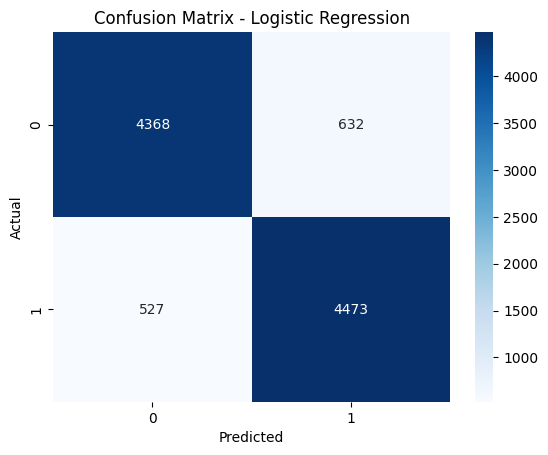


Naive Bayes Accuracy: 0.8452
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      5000
           1       0.84      0.85      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



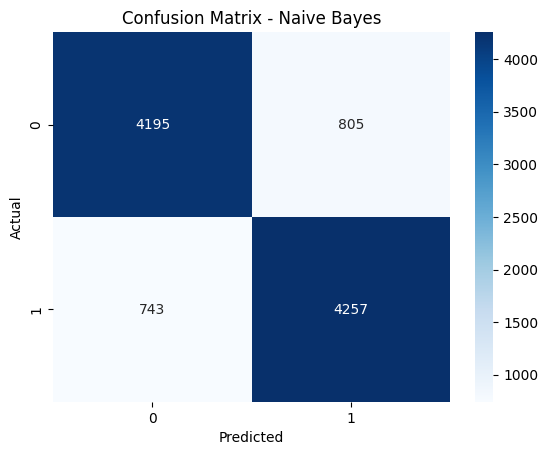

In [12]:
# 9. Evaluation Function
def evaluate_model(y_true, y_pred, title=""):
    print(f"\n{title} Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_nb, "Naive Bayes")


# 10. Bonus: Word Cloud Visualization

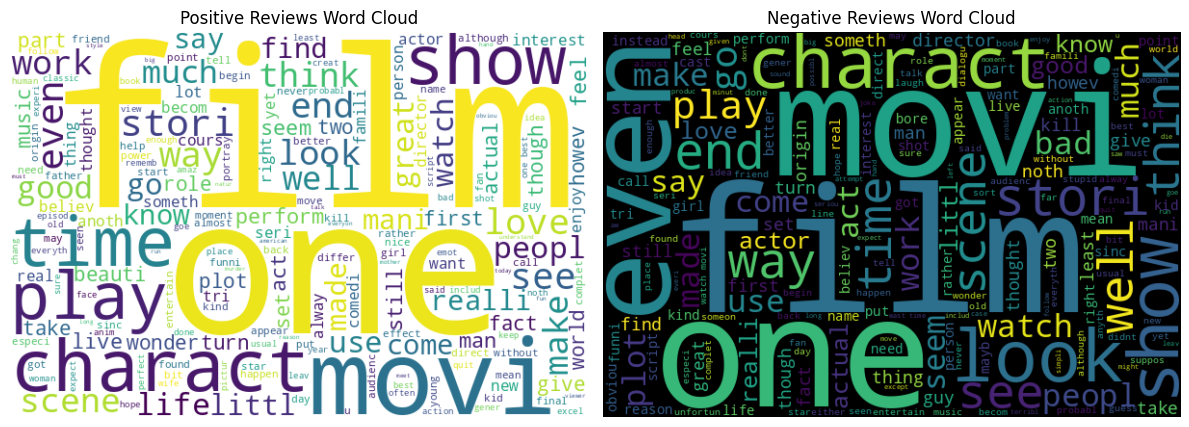

In [ ]:


positive_text = " ".join(df[df['sentiment'] == 1]['clean_review'])
negative_text = " ".join(df[df['sentiment'] == 0]['clean_review'])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=600, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title("Positive Reviews Word Cloud")
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=600, height=400, background_color='black').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title("Negative Reviews Word Cloud")
plt.axis('off')
plt.tight_layout()
plt.show()


In [14]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8452


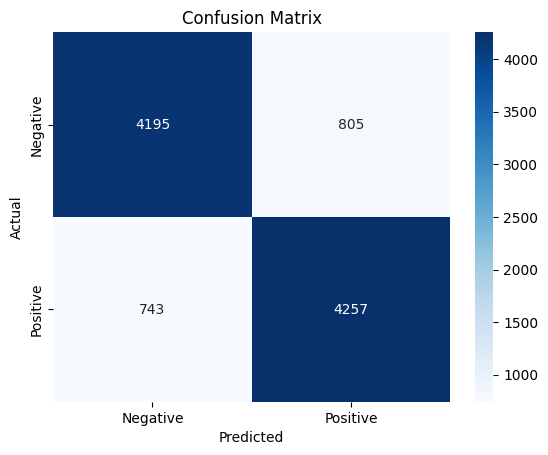

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [16]:
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_nb = accuracy_score(y_test, y_pred_nb)

print(f"Logistic Regression Accuracy: {acc_lr:.4f}")
print(f"Naive Bayes Accuracy: {acc_nb:.4f}")


Logistic Regression Accuracy: 0.8841
Naive Bayes Accuracy: 0.8452


In [17]:
import pickle

# Save the trained model
with open("model.pkl", "wb") as f:
    pickle.dump(lr_model, f)

# Save the vectorizer
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)


In [18]:
import os

# List all files in the current directory
for file in os.listdir():
    print(file)



vectorizer.pkl
model.pkl
__notebook__.ipynb
